# Machine stocks predict

## 1. Import importan libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

## 2. Prepare the DataFrame

In [2]:
df = pd.read_csv('data.csv', sep=';')

df = df.rename(columns={'<DATE>': 'Date', '<OPEN>': 'Open', '<HIGH>': 'High', '<CLOSE>': 'Close', '<LOW>': 'Low', '<VOL>': 'Volume'})

df = df.drop(columns=['<TICKER>', '<PER>', '<TIME>'])

df['Date'] = pd.to_datetime(pd.Series(map(lambda x: str(x)[:2] + '/' + str(x)[2:4] + '/' + str(x)[4:], df['Date'])), format='%y/%m/%d')

final_df = df.drop(columns=['Date'])

final_df

,Open,High,Low,Close,Volume
0,6.50,6.60,6.50,6.59,126858667
1,6.57,6.61,6.56,6.57,163202276
2,6.57,6.63,6.56,6.62,157233360
3,6.60,6.63,6.58,6.62,146732984
4,6.64,6.70,6.64,6.69,210250834
...,...,...,...,...,...
251,7.94,7.95,7.89,7.92,69074347
252,7.92,7.93,7.80,7.82,171211390
253,7.82,7.84,7.79,7.82,123660065
254,7.86,7.90,7.81,7.83,176240959


## 3. Split the data to - train, val, test

In [3]:
x = final_df.drop(columns=['Close', 'High', 'Low'])
y = final_df['Close']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, train_size=0.5)

## 4. Create and fit the model

In [4]:
model = Sequential()
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=Adagrad(learning_rate=0.01), metrics=['mse'])

history = model.fit(x_train, y_train, epochs=15, batch_size=4, validation_split=0.2, validation_data=(x_val, y_val))

Epoch 1/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 8908975374336.0000 - mse: 8908975374336.0000 - val_loss: 253.6541 - val_mse: 253.6541
Epoch 2/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.2894 - mse: 31.2894 - val_loss: 6.2591 - val_mse: 6.2591
Epoch 3/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.9872 - mse: 11.9872 - val_loss: 8.5622 - val_mse: 8.5622
Epoch 4/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.0363 - mse: 13.0363 - val_loss: 6.0459 - val_mse: 6.0459
Epoch 5/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.1475 - mse: 13.1475 - val_loss: 6.8882 - val_mse: 6.8882
Epoch 6/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.3070 - mse: 24.3070 - val_loss: 6.8123 - val_mse: 6.8123
Epoch 7/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33.4482 - mse: 33.4482 - val_loss: 18.3955 - val_mse: 18.3955
Epoch 8/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.2515 - mse: 11.2515 - val_loss: 6.8856 - val_mse: 6.8856
Epoch 9/15
51/51 ━━━━━━━━━━

## 5. Show the results of the model

- Results of the mean squared error

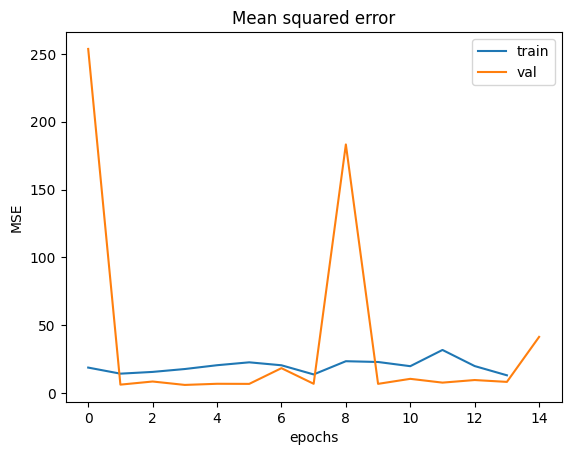

In [5]:
plt.plot(history.history['mse'][1:])
plt.plot(history.history['val_mse'])
plt.title('Mean squared error')
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.legend(['train', 'val'])
plt.show()

- Results of the loss

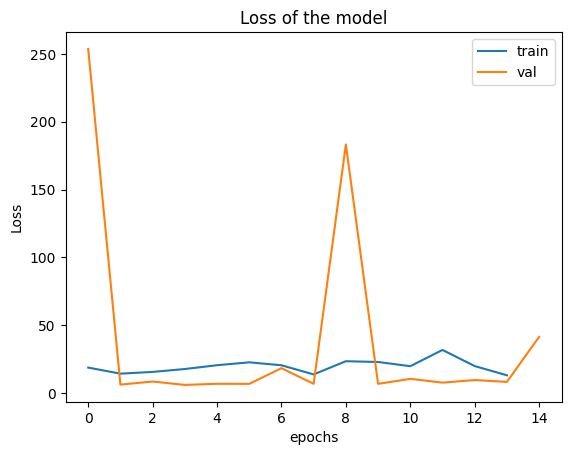

In [9]:
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'])
plt.title('Loss of the model')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'])
plt.show()

## 6. Сохранение весов модели

In [6]:
model.save('tinkofportfel.keras')

__________________________________________________________________________________________________________________